In [24]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Interpolate avec scipy

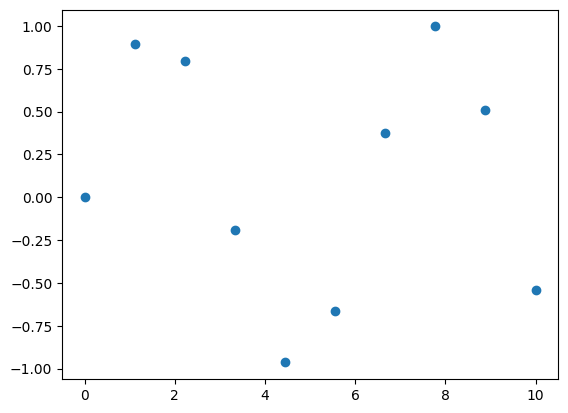

In [25]:
#dataset
x= np.linspace(0,10,10)
y= np.sin(x)
plt.scatter(x,y)

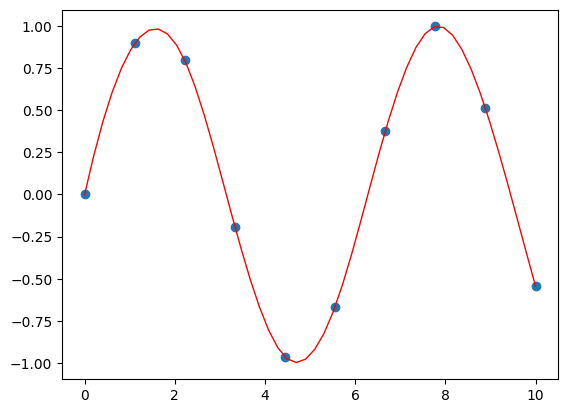

In [26]:
'''
fonction interpolate (1d ou 2d en suffixe) : interp1d, argument kind : ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ ‘previous’, or ‘next’.
'''
from scipy.interpolate import interp1d
f = interp1d(x,y, kind='cubic')
new_x = np.linspace(0,10,50)
res = f(new_x)
plt.scatter(x,y)
plt.plot(new_x, res, c='r', lw=1)

Traitement du signal (Fourier transform)

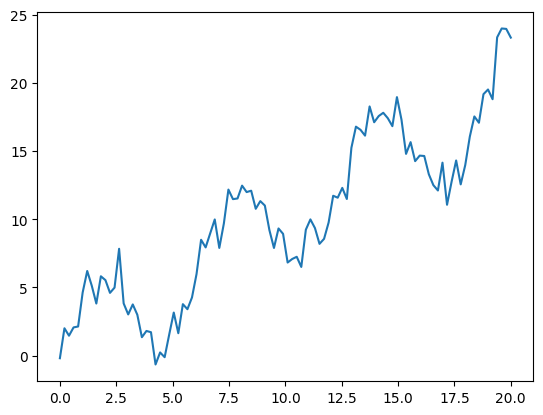

In [27]:
#data
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0]) #sinusoïde croissant avec bruit aléatoire
plt.plot(x,y)

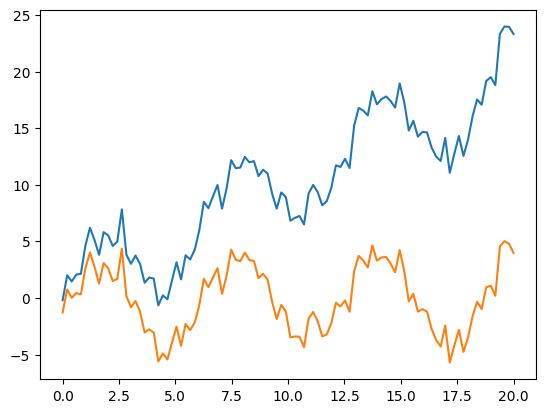

In [28]:
#module signal
from scipy import signal
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)

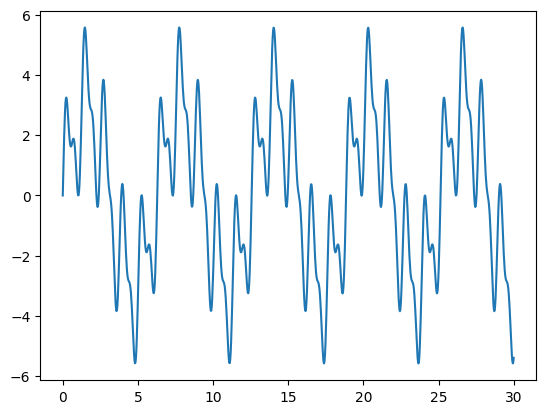

In [29]:
#Signal périodique
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

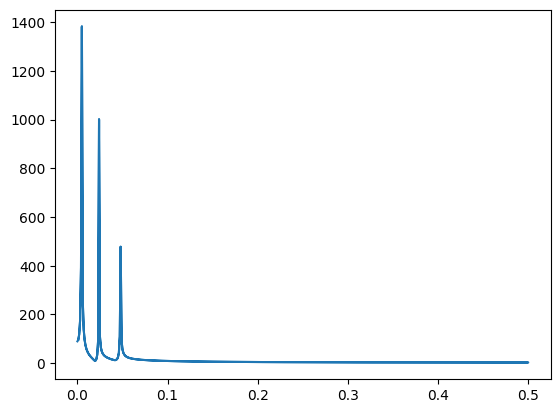

In [30]:
#fourier : module fftpack
from scipy import fftpack
amplitude = fftpack.fft(y)
frequence = fftpack.fftfreq(y.size)
#spectre : ne pas se faire avoir pas les frequences/amplitudes negatives
plt.plot(np.abs(frequence), np.abs(amplitude))

Noise filter

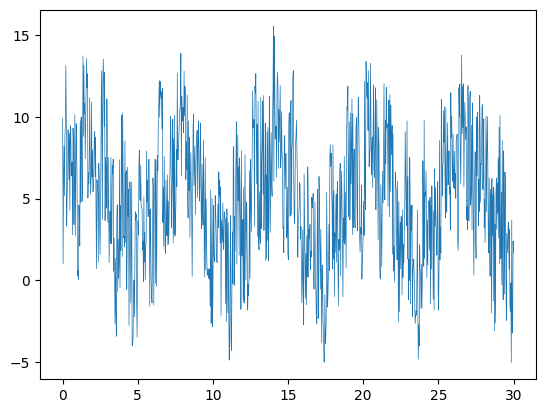

In [31]:
#same signal, avec du bruit
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y, lw=0.5)

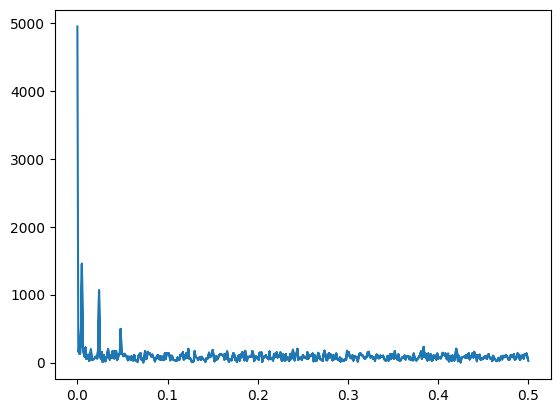

In [32]:
from scipy import fftpack
amplitude = fftpack.fft(y)
frequence = fftpack.fftfreq(y.size)
power= np.abs(amplitude)
#spectre : ne pas se faire avoir pas les frequences/amplitudes negatives
plt.plot(np.abs(frequence), power)

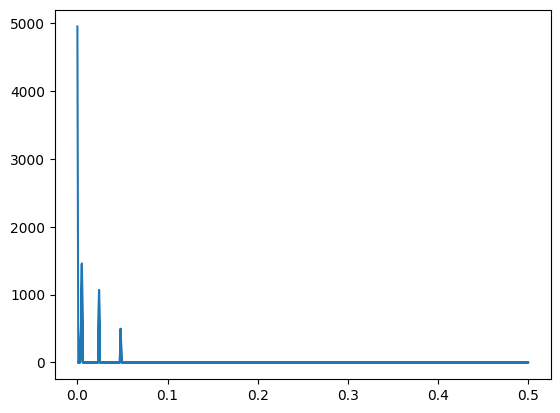

In [33]:
#Filtrage
seuil = 400
amplitude[power<seuil] = 0
plt.plot(np.abs(frequence), np.abs(amplitude))

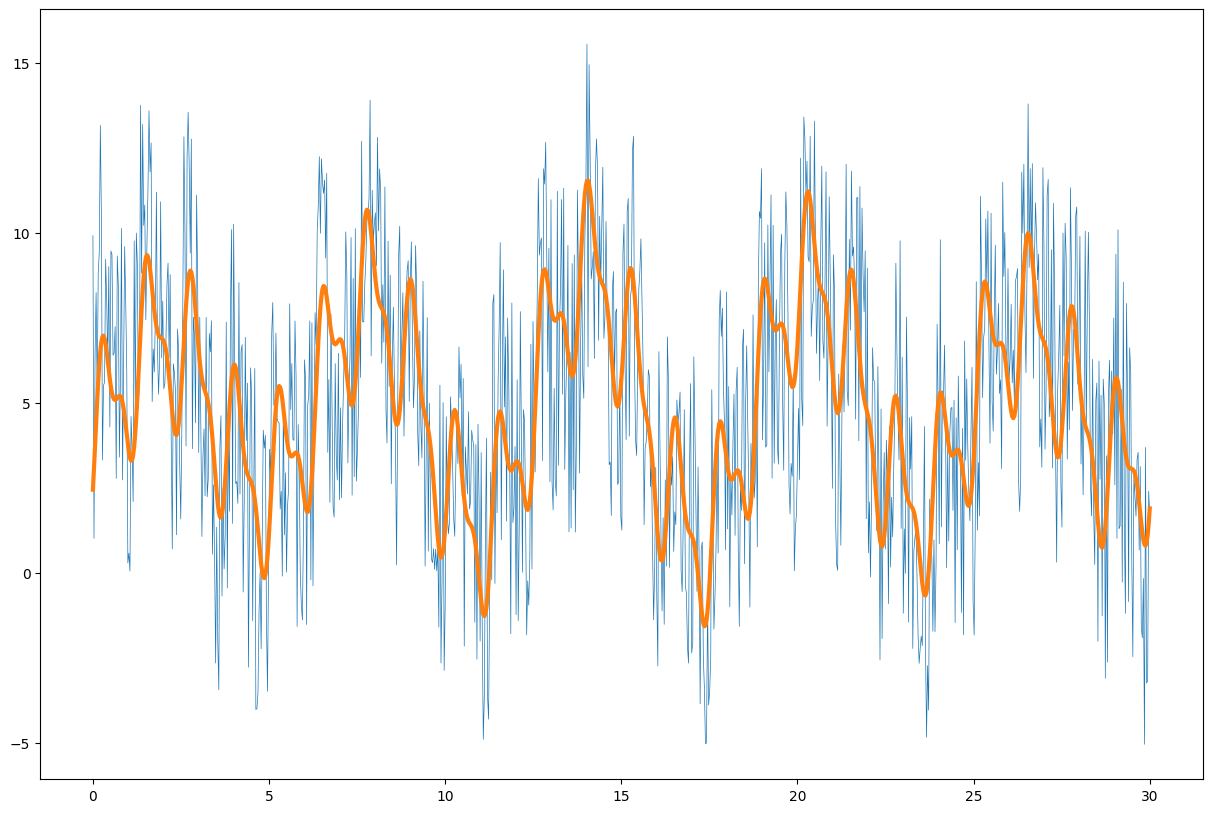

In [34]:
#Transformee inverse
filtered_signal= fftpack.ifft(amplitude)
plt.figure(figsize=(15,10))
plt.plot(x,y, lw=0.5)
plt.plot(x, filtered_signal, lw=3)

Module Ndimage

(215, 227, 4)


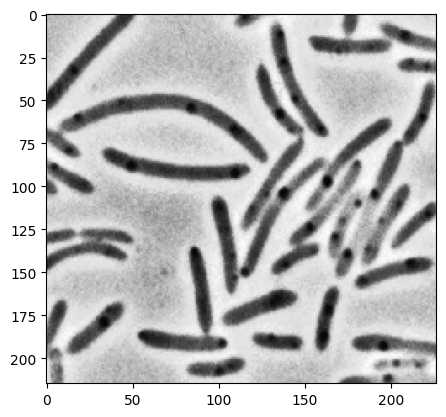

In [35]:
from scipy import ndimage
#stock image de bacteries
file = open("bact.png", "br")
image = plt.imread(file)
print(image.shape) #image 3D
image= image[:,:,0] #reduite en 2D
plt.imshow(image, cmap='gray')

(array([1.000e+00, 1.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 7.000e+00,
        2.700e+01, 2.100e+01, 2.100e+01, 0.000e+00, 3.200e+01, 2.300e+01,
        2.300e+01, 0.000e+00, 3.200e+01, 2.900e+01, 3.100e+01, 2.400e+01,
        0.000e+00, 2.800e+01, 2.700e+01, 2.200e+01, 2.400e+01, 0.000e+00,
        2.800e+01, 3.000e+01, 3.300e+01, 0.000e+00, 3.700e+01, 3.200e+01,
        4.000e+01, 4.200e+01, 6.300e+01, 0.000e+00, 6.000e+01, 7.100e+01,
        7.200e+01, 0.000e+00, 8.700e+01, 7.200e+01, 8.000e+01, 0.000e+00,
        8.000e+01, 8.900e+01, 2.020e+02, 0.000e+00, 0.000e+00, 1.030e+02,
        2.040e+02, 0.000e+00, 1.160e+02, 0.000e+00, 2.790e+02, 0.000e+00,
        1.650e+02, 0.000e+00, 3.350e+02, 0.000e+00, 1.610e+02, 1.780e+02,
        1.970e+02, 0.000e+00, 2.230e+02, 1.950e+02, 2.010e+02, 2.180e+02,
        0.000e+00, 2.140e+02, 2.610e+02, 0.000e+00, 2.380e+02, 2.230e+02,
        2.390e+02, 2.420e+02, 0.000e+00, 2.450e+02, 2.290e+02, 2.200e+02,
        1.930e+02, 0.000e+00, 1.710e+0

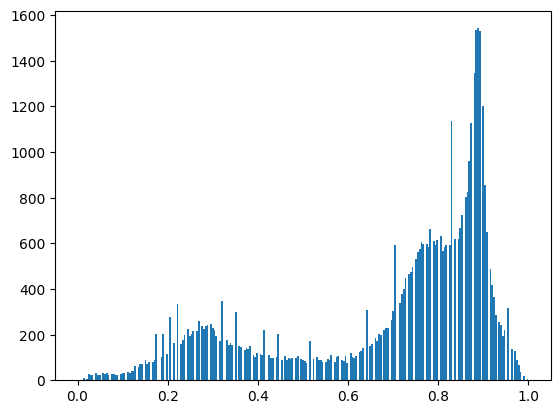

In [36]:
image_copy = np.copy(image)
plt.hist(image_copy.ravel(), bins = 255) #histogramme densité, applatir l'image avec ravel, 255 categories (image 8 bits)

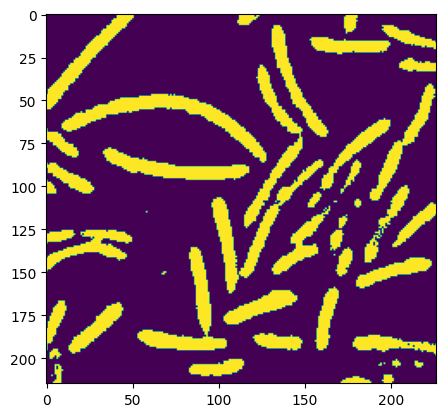

In [37]:
#boolean indexing pour filtrer le fond de l'image
image_filt = image<0.5
plt.imshow(image_filt)

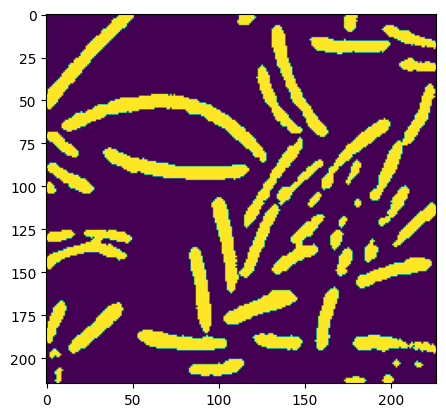

In [38]:
#morpho pour réduire les artefacts
image_3 = ndimage.binary_opening(image_filt)
plt.imshow(image_3)

47


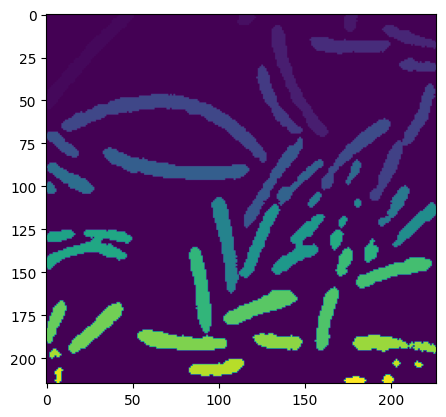

In [39]:
#fonction label de ndimage :    label , nombre label = ndimage.label(image)
label_image, n_labels = ndimage.label(image_3)
print(n_labels)
plt.imshow(label_image)

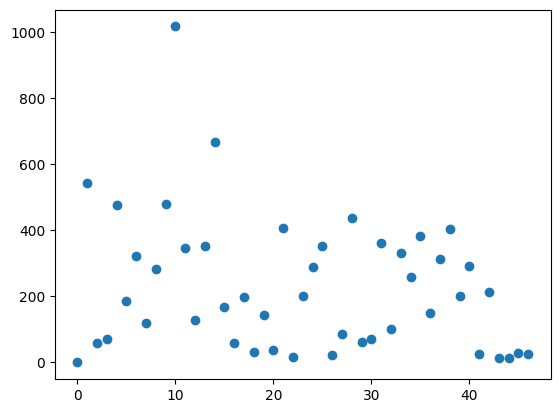

In [40]:
#compte des pixels de chaque groupe avec ndimage.sum(image, image labelisé, range(nombre de labels))
sizes = ndimage.sum(image_3, label_image, range(n_labels))
plt.scatter(range(n_labels), sizes)